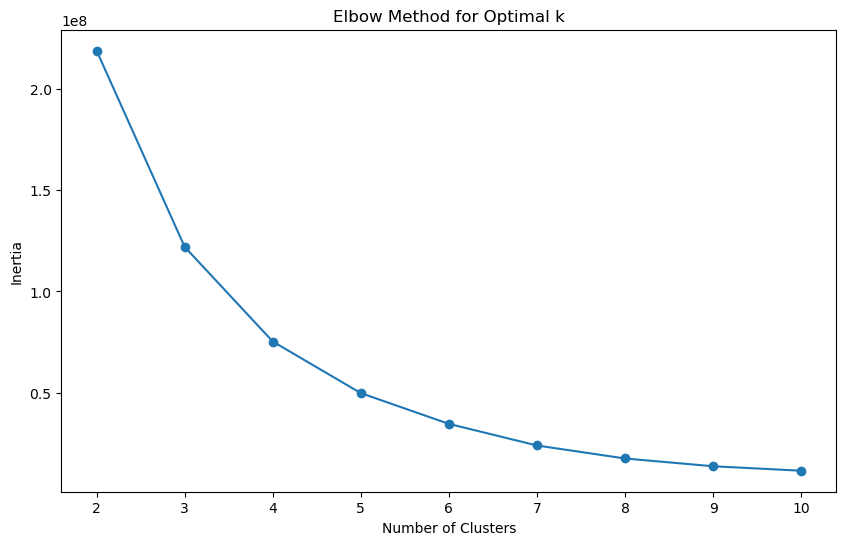

Davies-Bouldin Index: 0.5828154100698718


In [1]:
#Task 3: Customer Segmentation / Clustering

import os
import warnings
import pandas as pd  # Importing the pandas library for data manipulation
from sklearn.cluster import KMeans  # Importing KMeans for clustering
from sklearn.metrics import davies_bouldin_score  # Importing Davies-Bouldin score for evaluation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress warnings
warnings.filterwarnings("ignore")

# Load datasets from the Downloads folder
downloads_path = r'C:\Users\amank\Downloads'  # Update this path as necessary
transactions = pd.read_csv(downloads_path + '\\Transactions.csv')  # Load transaction data

# Prepare data for clustering
customer_data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
X = customer_data[['TotalValue', 'Quantity']]

# Determine optimal number of clusters (2-10)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans with chosen k
optimal_k = 4  # Example, choose based on elbow method
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Set n_init explicitly
customer_data['Cluster'] = kmeans.fit_predict(X)

# Calculate DB Index
db_index = davies_bouldin_score(X, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Save clustering results
customer_data.to_csv(downloads_path + '\\Aman_Kumar_Clustering.csv', index=False)  # Save the clustering results